# 0. Import libraries

In [1]:
import numpy as np
import pandas as pd

# 1. 데이터 적재
## sepal, petal

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
print "iris_dataset의 키: \n", iris_dataset.keys()

iris_dataset의 키: 
['target', 'DESCR', 'target_names', 'feature_names', 'data', 'filename']


In [4]:
print iris_dataset['DESCR'][:193] + "\n..."

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [5]:
print "타겟의 이름: \n", iris_dataset["target_names"]

타겟의 이름: 
['setosa' 'versicolor' 'virginica']


In [6]:
print "특성의 이름: \n", iris_dataset["feature_names"]

특성의 이름: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print "data의 타입: ", type(iris_dataset['data'])

data의 타입:  <type 'numpy.ndarray'>


In [8]:
print "data의 처음 다섯 행: \n", iris_dataset['data'][:5]

data의 처음 다섯 행: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
print "타겟의 타입: ", type(iris_dataset['target'])

타겟의 타입:  <type 'numpy.ndarray'>


In [10]:
print "data의 크기: ", iris_dataset['data'].shape

data의 크기:  (150, 4)


In [11]:
print "타겟의 크기: ", iris_dataset['target'].shape

타겟의 크기:  (150,)


In [12]:
print "타겟: \n", iris_dataset["target"]

타겟: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 2. 성과 측정: 훈련 데이터(Train data)와 테스트 데이터(Test data)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'], random_state = 0)

In [14]:
print "X_train의 크기: ", X_train.shape #75%
print "y_train의 크기: ", y_train.shape #75%

X_train의 크기:  (112, 4)
y_train의 크기:  (112,)


In [15]:
print "X_test의 크기: ", X_test.shape #25%
print "y_test의 크기: ", y_test.shape #25%

X_test의 크기:  (38, 4)
y_test의 크기:  (38,)


# 3.  가장 먼저 할 일: 데이터 살펴보기(에러)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a97183ed0>,
      dtype=object)

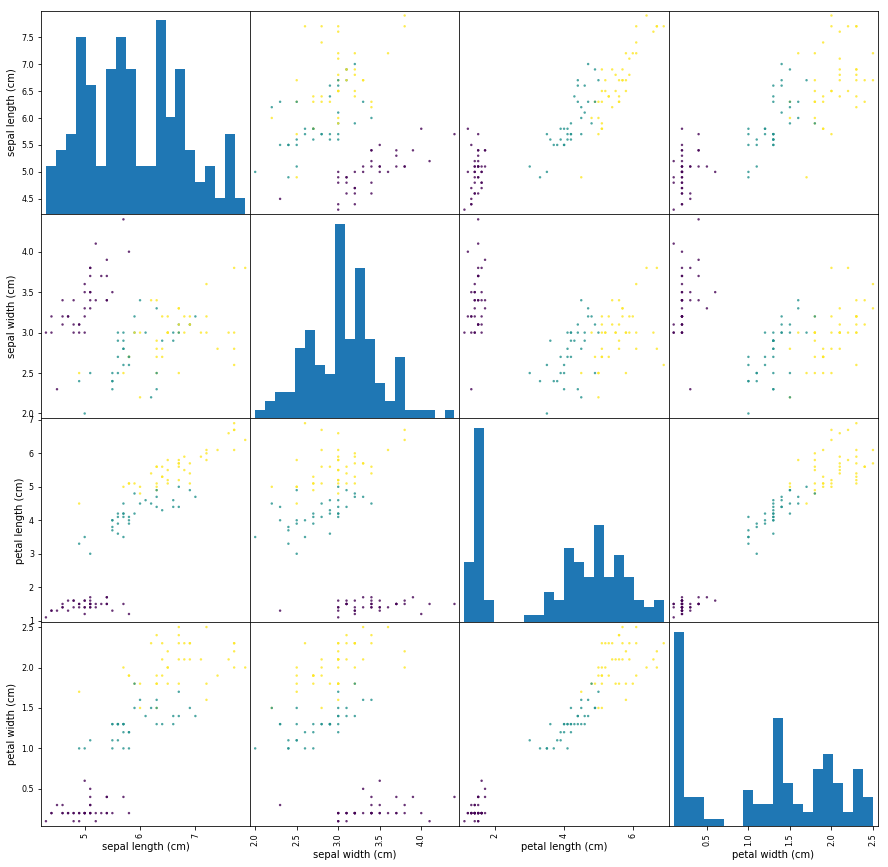

In [23]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins': 20}, s=6, alpha=.8)

# 4. k-nn 알고리즘

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# 5. 예측

In [19]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print'X_new.shape:', X_new.shape

X_new.shape: (1, 4)


In [20]:
prediction = knn.predict(X_new)
print '예측: ',prediction
print '예측한 타깃의 이름:',iris_dataset['target_names'][prediction]

예측:  [0]
예측한 타깃의 이름: ['setosa']


# 6. 예측하기 

In [21]:
y_pred = knn.predict(X_test)
print '테스트 세트에 대한 예측값: ', y_pred

테스트 세트에 대한 예측값:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [22]:
print('테스트 세트의 정확도 : {:.2f}'.format(np.mean(y_pred == y_test)))

테스트 세트의 정확도 : 0.97
